In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
df_dsa.shape

(9700, 11)

In [4]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [31]:
df_dsa["Data_Pedido"] = pd.to_datetime(df_dsa["Data_Pedido"], format= "%d/%m/%Y")

In [32]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [74]:
df_dsa[df_dsa["Categoria"] == 'Office Supplies'].groupby(['Cidade'])["Valor_Venda"].sum().reset_index().sort_values(["Valor_Venda"], ascending = False).head(1)

,Cidade,Valor_Venda
295,New York City,68362.814


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

<BarContainer object of 1226 artists>

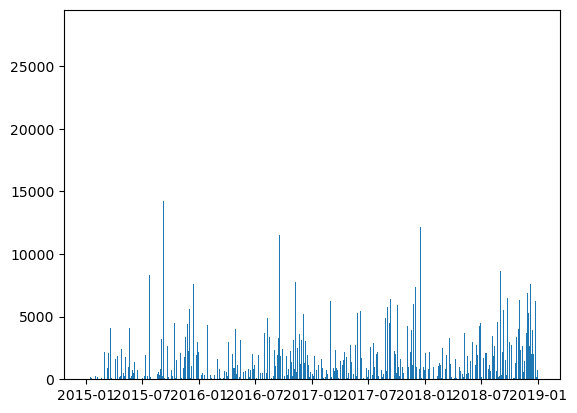

In [40]:
new_data_2 = df_dsa.groupby(["Data_Pedido"])["Valor_Venda"].sum().reset_index().sort_values(["Data_Pedido"])
plt.bar(new_data_2["Data_Pedido"],new_data_2["Valor_Venda"])

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

<BarContainer object of 49 artists>

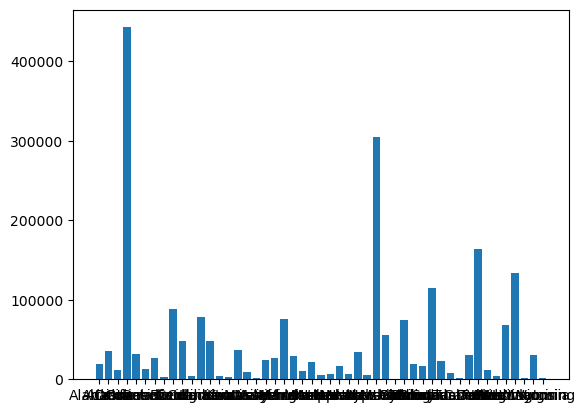

In [45]:
new_data_3 = df_dsa.groupby(["Estado"])["Valor_Venda"].sum().reset_index()
plt.bar(new_data_3["Estado"],new_data_3["Valor_Venda"])

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

<BarContainer object of 10 artists>

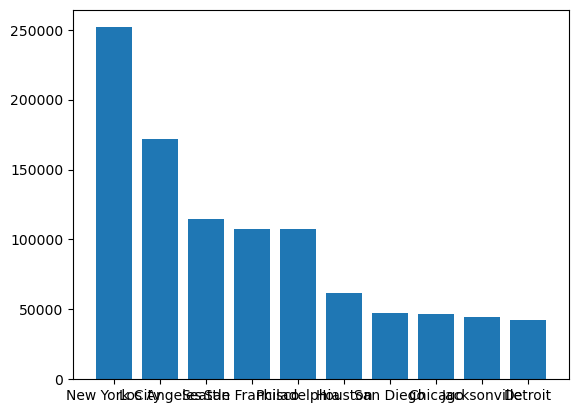

In [119]:
new_data_4 = df_dsa.groupby(["Cidade"])["Valor_Venda"].sum().reset_index().sort_values(["Valor_Venda"], ascending= False).head(10)
plt.bar(new_data_4.Cidade, new_data_4.Valor_Venda)

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

([<matplotlib.patches.Wedge at 0x19f0422d910>,
 [Text(-0.02481649385021504, 1.0997200287495825, 'Consumer'),
  Text(-0.5946671393211097, -0.9254031518271634, 'Corporate'),
  Text(0.91175166120585, -0.6153932956153919, 'Home Office')])

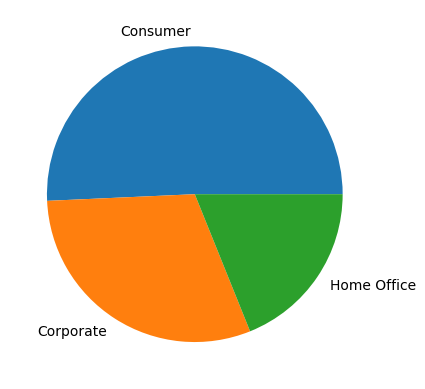

In [76]:
new_data_5 = df_dsa.groupby("Segmento")["Valor_Venda"].sum().reset_index()
plt.pie(x = new_data_5.Valor_Venda, labels= new_data_5.Segmento)

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [78]:
df_dsa.groupby(["Segmento",df_dsa["Data_Pedido"].dt.year])["Valor_Venda"].sum().reset_index()

,Segmento,Data_Pedido,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [82]:
df_dsa["Percentual_Desconto"] = df_dsa["Valor_Venda"].apply(lambda x: 15 if x > 1000 else 10)
df_dsa["Percentual_Desconto"].value_counts()

10    9243
15     457
Name: Percentual_Desconto, dtype: int64

## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [114]:
media_antes_desconto = df_dsa["Valor_Venda"].mean()
serie_depois_desconto = df_dsa["Valor_Venda"] * (100-df_dsa["Percentual_Desconto"])/100
media_depois_desconto = serie_depois_desconto.mean()
#se eu nao quisesse dar o de 10% era só dar um apply ou 
print("Média antes do desconto:",media_antes_desconto,"\nMédia depois do desconto:",media_depois_desconto)
serie_depois_desconto

Média antes do desconto: 230.46989223710855 
Média depois do desconto: 202.436402128865


0       235.76400
1       658.74600
2        13.15800
3       861.81975
4        20.13120
          ...    
9695     20.54700
9696     48.88800
9697    177.09840
9698      3.25800
9699     10.38600
Length: 9700, dtype: float64

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [95]:
df_dsa.groupby(["Segmento",df_dsa["Data_Pedido"].dt.year,df_dsa["Data_Pedido"].dt.month])["Valor_Venda"].mean()

Segmento     Data_Pedido  Data_Pedido
Consumer     2015         1              146.736787
                          2              117.327926
                          3              152.170564
                          4              189.762750
                          5              191.337439
                                            ...    
Home Office  2018         8              176.160606
                          9              249.140597
                          10             412.576597
                          11             247.519423
                          12             224.523983
Name: Valor_Venda, Length: 144, dtype: float64

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [113]:
top_subcategorias = list(df_dsa.groupby("SubCategoria")["Valor_Venda"].sum().reset_index().sort_values(["Valor_Venda"] ,ascending = False).head(12)["SubCategoria"])
query10 = df_dsa[df_dsa["SubCategoria"].isin(top_subcategorias)].groupby(["Categoria","SubCategoria"])["Valor_Venda"].sum().reset_index()
query10

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Bookcases,108045.0467
1,Furniture,Chairs,317919.6250
2,Furniture,Furnishings,88862.7700
3,Furniture,Tables,202083.3600
4,Office Supplies,Appliances,104061.6930
5,Office Supplies,Binders,194723.3810
6,Office Supplies,Paper,76312.7640
7,Office Supplies,Storage,216188.3620
8,Technology,Accessories,162791.3620
9,Technology,Copiers,146248.0940


# Fim